<a href="https://colab.research.google.com/github/grmounica/Deep-Learning-Lab-Practice-work/blob/main/AutoEncoders_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install split-folders

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/MyDrive/Colab\ Notebooks/DL\ Hackathon/Medical_MNIST.zip

Streaming output truncated to the last 5000 lines.
  inflating: HeadCT/005000.jpeg      
  inflating: HeadCT/005001.jpeg      
  inflating: HeadCT/005002.jpeg      
  inflating: HeadCT/005003.jpeg      
  inflating: HeadCT/005004.jpeg      
  inflating: HeadCT/005005.jpeg      
  inflating: HeadCT/005006.jpeg      
  inflating: HeadCT/005007.jpeg      
  inflating: HeadCT/005008.jpeg      
  inflating: HeadCT/005009.jpeg      
  inflating: HeadCT/005010.jpeg      
  inflating: HeadCT/005011.jpeg      
  inflating: HeadCT/005012.jpeg      
  inflating: HeadCT/005013.jpeg      
  inflating: HeadCT/005014.jpeg      
  inflating: HeadCT/005015.jpeg      
  inflating: HeadCT/005016.jpeg      
  inflating: HeadCT/005017.jpeg      
  inflating: HeadCT/005018.jpeg      
  inflating: HeadCT/005019.jpeg      
  inflating: HeadCT/005020.jpeg      
  inflating: HeadCT/005021.jpeg      
  inflating: HeadCT/005022.jpeg      
  inflating: HeadCT/005023.jpeg      
  inflating: HeadCT/005024.jpeg      

In [5]:
import os
import splitfolders 

input_dir = os.path.join('Medical_MNIST')
output_dir = os.path.join('MedicalMNIST_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.62 files/s]
Copying files: 1074 files [00:00,  8.03 files/s]
Copying files: 2188 files [00:00, 11.47 files/s]
Copying files: 3276 files [00:00, 16.38 files/s]
Copying files: 4285 files [00:00, 23.38 files/s]
Copying files: 5405 files [00:00, 33.37 files/s]
Copying files: 6481 files [00:00, 47.60 files/s]
Copying files: 7466 files [00:00, 67.86 files/s]
Copying files: 8428 files [00:00, 96.66 files/s]
Copying files: 9389 files [00:01, 137.41 files/s]
Copying files: 10316 files [00:01, 193.51 files/s]
Copying files: 11288 files [00:01, 274.10 files/s]
Copying files: 12375 files [00:01, 387.38 files/s]
Copying files: 13446 files [00:01, 544.95 files/s]
Copying files: 14510 files [00:01, 761.76 files/s]
Copying files: 15563 files [00:01, 1055.49 files/s]
Copying files: 16646 files [00:01, 1447.31 files/s]
Copying files: 17751 files [00:02, 1957.69 files/s]
Copying files: 18804 files [00:02, 2589.66 files/s]
Copyin

Training and test data from these folders with image generator from TensorFlow.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Specifiy the path to training and validation folder
train_dir = os.path.join('MedicalMNIST_splitted/train')
test_dir = os.path.join('MedicalMNIST_splitted/val')

# Apply image generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(44, 44),
                                                   batch_size= 47163,
                                                   class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(44, 44),
                                                   batch_size=11791,
                                                   class_mode='categorical')

# Fetch training and test data and their ground-trith label
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

n_examples = 500
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

labels = [np.where(i==1)[0][0] for i in example_labels]

Found 47163 images belonging to 6 classes.
Found 11791 images belonging to 6 classes.


Building the auto encoder model

In [9]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Dense, Reshape

encoded_dim = 2

encoder = Sequential([
    Conv2D(input_shape=(44,44,3), filters= 64, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D( (2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(encoded_dim)
])

pretrain_encodings = encoder(example_images).numpy()


In [10]:
decoder = Sequential ([
    Dense(1936, activation = 'relu', input_shape=(encoded_dim,)),
    Reshape((11,11,16)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), padding='same') 
])

In [11]:
autoencoder_dr = Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))

autoencoder_dr.compile(loss = 'mse')

autoencoder_dr.fit(x_train, x_train, epochs = 10, verbose=1)

Epoch 1/10
1474/1474 [==============================] - 15s 9ms/step - loss: 0.0381
Epoch 2/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0225
Epoch 3/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0209
Epoch 4/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0201
Epoch 5/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0197
Epoch 6/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0194
Epoch 7/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0192
Epoch 8/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0190
Epoch 9/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0187
Epoch 10/10
1474/1474 [==============================] - 13s 9ms/step - loss: 0.0187


Visualization of data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


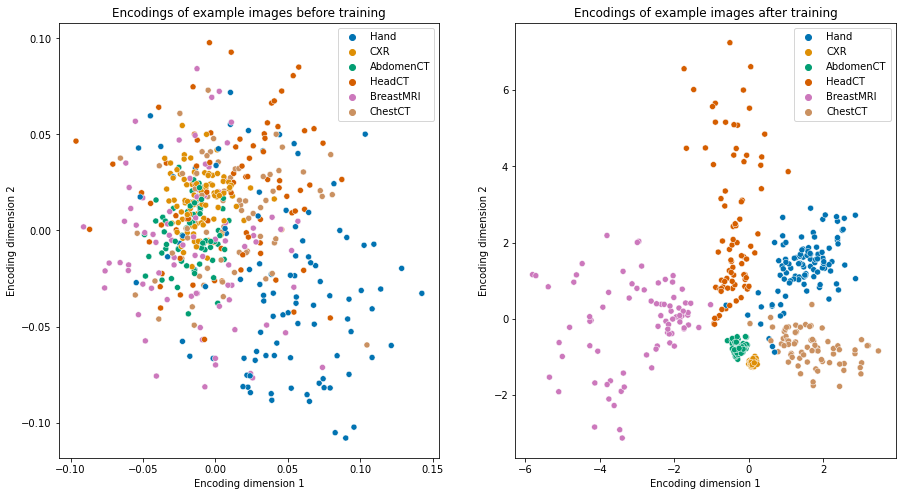

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = np.array(['AbdomenCT', 'BreastMRI', 'ChestCT','CXR','Hand','HeadCT'])
posttrain_encodings = encoder(example_images).numpy()

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.scatterplot(pretrain_encodings[:, 0],
                pretrain_encodings[:, 1],
                hue=class_names[labels], ax=axs[0],
                palette=sns.color_palette("colorblind", 6));
sns.scatterplot(posttrain_encodings[:, 0],
                posttrain_encodings[:, 1],
                hue=class_names[labels], ax=axs[1],
                palette=sns.color_palette("colorblind", 6));

axs[0].set_title('Encodings of example images before training');
axs[1].set_title('Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='upper right')

In [14]:

reconstructed_img = autoencoder_dr(example_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


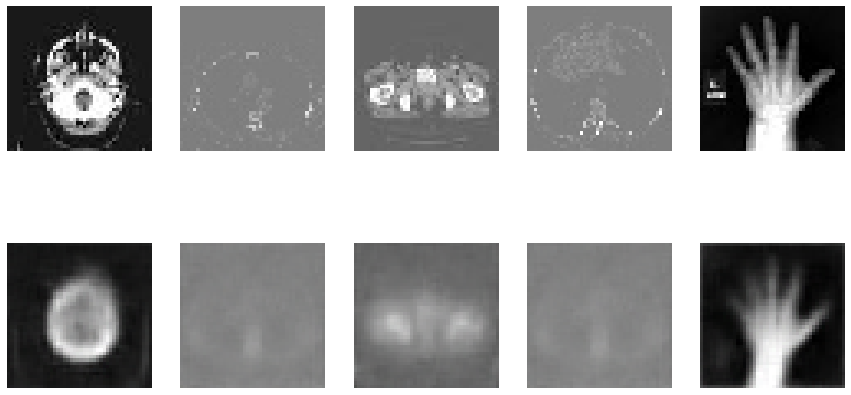

In [15]:

f, axs = plt.subplots(2, 5, figsize=(15, 8))
for j in range(5):
    axs[0, j].imshow(example_images[j+20], cmap='binary')
    axs[1, j].imshow(reconstructed_img[j+20].numpy().squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

Image Denoising

In [16]:
noise_factor = 0.2
x_train_rand = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_rand = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


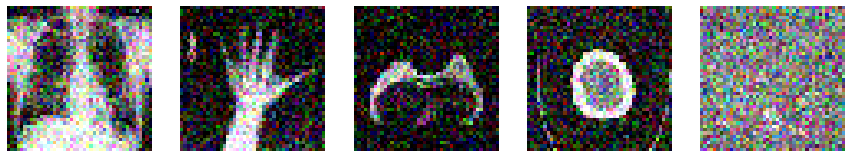

In [17]:

f, axs = plt.subplots(1, 5, figsize=(15, 8))
for j in range(len(axs)):
    axs[j].imshow(x_train_rand[j+5], cmap='binary')
    axs[j].axis('off')

In [18]:
encoder_noise = Sequential([
    
    Conv2D(input_shape = (44,44,3), filters = 256, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
])

encoder_noise.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 44, 256)       7168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 128)       295040    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        73792     
Total params: 376,000
Trainable params: 376,000
Non-trainable params: 0
_________________________________________________________________


In [19]:
decoder_noise = Sequential ([
    Conv2D(input_shape=(11, 11, 64), filters = 128, kernel_size=(3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

decoder_noise.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 256)       295168    
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 44, 44, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 44, 44, 3)         6915      
Total params: 375,939
Trainable params: 375,939
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder_noise = Model(inputs = encoder_noise.inputs, outputs = decoder_noise(encoder_noise.outputs))
autoencoder_noise.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder_noise.fit(x_train_rand, x_train,
                epochs=10,
                verbose=1)

Epoch 1/10
1474/1474 [==============================] - 33s 22ms/step - loss: 0.4757
Epoch 2/10
1474/1474 [==============================] - 32s 21ms/step - loss: 0.4546
Epoch 3/10
1474/1474 [==============================] - 32s 21ms/step - loss: 0.4553
Epoch 4/10
1474/1474 [==============================] - 32s 21ms/step - loss: 0.4544
Epoch 5/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4540
Epoch 6/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4524
Epoch 7/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4530
Epoch 8/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4528
Epoch 9/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4519
Epoch 10/10
1474/1474 [==============================] - 32s 22ms/step - loss: 0.4507


In [21]:
x_predict = autoencoder_noise.predict(x_test_rand)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


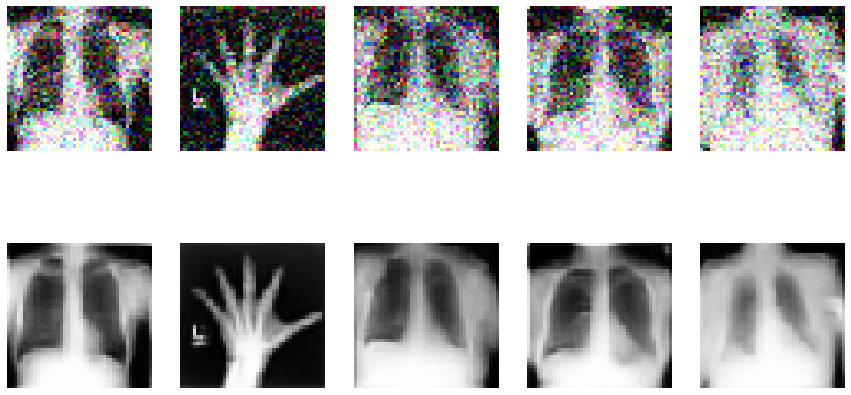

In [22]:
f, axs = plt.subplots(2, 5, figsize=(15, 8))
for j in range(5):
    axs[0, j].imshow(x_test_rand[j+13], cmap='binary')
    axs[1, j].imshow(x_predict[j+13], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')